# Kinematics for the KR210

In [1]:
# For matrix algebra we use the sympy package.
from mpmath import *
from sympy import *
import time
init_printing(use_unicode=True)

In [2]:
%%HTML
<style> code {background-color : white !important;} </style>

# Denavit-Hartenberg Parameters

In [3]:
# Define Denavit-Hartenberg parameter symbols.
q1, q2, q3, q4, q5, q6, q7 = symbols('q1:8') # joint angles (theta_i)         
d1, d2, d3, d4, d5, d6, d7 = symbols('d1:8') # link offsets
a0, a1, a2, a3, a4, a5, a6 = symbols('a0:7') # link lengths
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = symbols('alpha0:7') # twist angles

In [4]:
# Denavit-Hartenberg parameters for KUKA KR210
s = {alpha0:     0,  a0:        0, d1:  0.75,
     alpha1: -pi/2,  a1:     0.35, d2:     0, q2: q2-pi/2, 
     alpha2:     0,  a2:     1.25, d3:     0,
     alpha3: -pi/2,  a3:   -0.054, d4:   1.5,
     alpha4:  pi/2,  a4:        0, d5:     0,
     alpha5: -pi/2,  a5:        0, d6:     0,
     alpha6:     0,  a6:        0, d7: 0.303, q7:       0}

## Forward Kinematics: Homogeneous Transforms

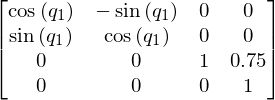

In [5]:
T0_1 = Matrix([[             cos(q1),            -sin(q1),            0,              a0],
               [ sin(q1)*cos(alpha0), cos(q1)*cos(alpha0), -sin(alpha0), -sin(alpha0)*d1],
               [ sin(q1)*sin(alpha0), cos(q1)*sin(alpha0),  cos(alpha0),  cos(alpha0)*d1],
               [                   0,                   0,            0,               1]])
T0_1 = T0_1.subs(s)
T0_1

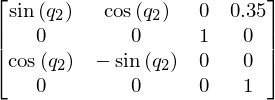

In [6]:
T1_2 = Matrix([[             cos(q2),            -sin(q2),            0,              a1],
               [ sin(q2)*cos(alpha1), cos(q2)*cos(alpha1), -sin(alpha1), -sin(alpha1)*d2],
               [ sin(q2)*sin(alpha1), cos(q2)*sin(alpha1),  cos(alpha1),  cos(alpha1)*d2],
               [                   0,                   0,            0,               1]])
T1_2 = T1_2.subs(s)
T1_2

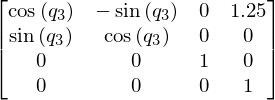

In [7]:
T2_3 = Matrix([[             cos(q3),            -sin(q3),            0,              a2],
               [ sin(q3)*cos(alpha2), cos(q3)*cos(alpha2), -sin(alpha2), -sin(alpha2)*d3],
               [ sin(q3)*sin(alpha2), cos(q3)*sin(alpha2),  cos(alpha2),  cos(alpha2)*d3],
               [                   0,                   0,            0,               1]])
T2_3 = T2_3.subs(s)
T2_3

## Rotation Matrix from ``O_3`` to ``O_0``

This is needed for determining the end-effector orientation later.

Wall time: 2.33 s


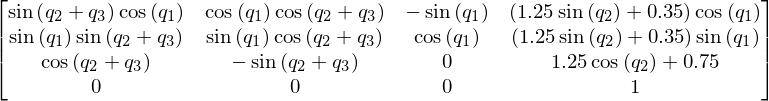

In [8]:
# generate total transformation matrix
%time T0_3 = trigsimp(T0_1 * T1_2 * T2_3)
T0_3

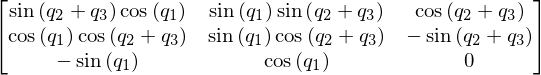

In [9]:
# rotation matrix
R0_3 = T0_3[0:3, 0:3]

# inverse rotation is equal to transpose
R3_0 = R0_3.transpose()
R3_0

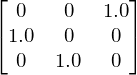

In [10]:
# evaluate matrix for default joint positions
R3_0.evalf(subs={q1: 0, q2: 0, q3: 0})

Continue with transformations from frame 3 to gripper frame.

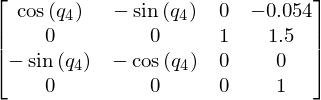

In [11]:
T3_4 = Matrix([[             cos(q4),            -sin(q4),            0,              a3],
               [ sin(q4)*cos(alpha3), cos(q4)*cos(alpha3), -sin(alpha3), -sin(alpha3)*d4],
               [ sin(q4)*sin(alpha3), cos(q4)*sin(alpha3),  cos(alpha3),  cos(alpha3)*d4],
               [                   0,                   0,            0,               1]])
T3_4 = T3_4.subs(s)
T3_4

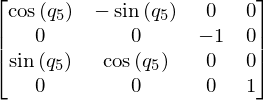

In [12]:
T4_5 = Matrix([[             cos(q5),            -sin(q5),            0,              a4],
               [ sin(q5)*cos(alpha4), cos(q5)*cos(alpha4), -sin(alpha4), -sin(alpha4)*d5],
               [ sin(q5)*sin(alpha4), cos(q5)*sin(alpha4),  cos(alpha4),  cos(alpha4)*d5],
               [                   0,                   0,            0,               1]])
T4_5 = T4_5.subs(s)
T4_5

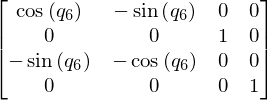

In [13]:
T5_6 = Matrix([[             cos(q6),            -sin(q6),            0,              a5],
               [ sin(q6)*cos(alpha5), cos(q6)*cos(alpha5), -sin(alpha5), -sin(alpha5)*d6],
               [ sin(q6)*sin(alpha5), cos(q6)*sin(alpha5),  cos(alpha5),  cos(alpha5)*d6],
               [                   0,                   0,            0,               1]])
T5_6 = T5_6.subs(s)
T5_6

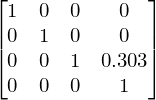

In [14]:
T6_G = Matrix([[             cos(q7),            -sin(q7),            0,              a6],
               [ sin(q7)*cos(alpha6), cos(q7)*cos(alpha6), -sin(alpha6), -sin(alpha6)*d7],
               [ sin(q7)*sin(alpha6), cos(q7)*sin(alpha6),  cos(alpha6),  cos(alpha6)*d7],
               [                   0,                   0,            0,               1]])
T6_G = T6_G.subs(s)
T6_G

# Combined Transformation

From base link to gripper link.

Wall time: 44.7 s


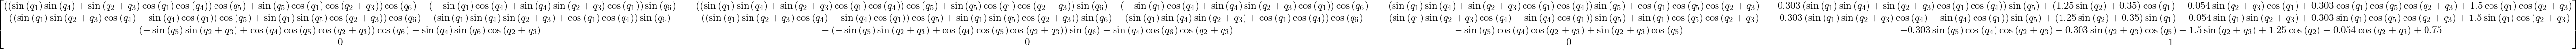

In [15]:
% time T0_G = trigsimp(T0_3 * T3_4 * T4_5 * T5_6 * T6_G)
T0_G

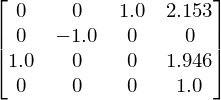

In [16]:
# evaluate matrix for default joint positions
T0_G.evalf(subs={q1: 0, q2: 0, q3: 0, q4: 0, q5: 0, q6: 0})

Rotate back to the URDF frame.

In [17]:
# Rotate 180 degree around z-axis
R_z = Matrix([[ cos(pi), -sin(pi), 0, 0],
              [ sin(pi),  cos(pi), 0, 0],
              [       0,        0, 1, 0],
              [       0,        0, 0, 1]])

# Rotate -90 degree around y-axis
R_y = Matrix([[  cos(-pi/2), 0, sin(-pi/2), 0],
              [           0, 1,          0, 0],
              [ -sin(-pi/2), 0, cos(-pi/2), 0],
              [           0, 0,          0, 1]])

Wall time: 41.1 s


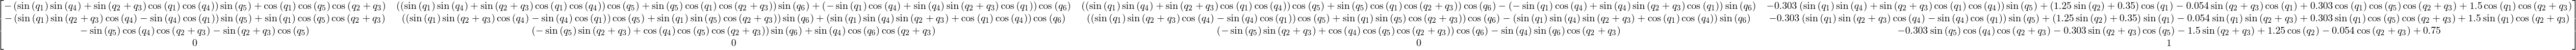

In [19]:
%time T0_G_0 = trigsimp(T0_G * R_z * R_y)
T0_G_0

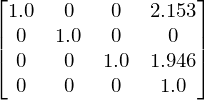

In [20]:
# evaluate matrix for default joint positions
T0_G_0.evalf(subs={q1: 0, q2: 0, q3: 0, q4: 0, q5: 0, q6: 0})

As a test I evaluate of ``T_0_G_0`` with default joint variables, i.e. all angles set to zero. This shows that the total transformation translates the end-effector frame ``G`` by 2.153 meters in ``x_0`` direction and 1.946 meters in ``z_0`` direction and keeps the orientation unchanged. This is consistent with my expectations, as detailed in the supporting material section 3.2, so I consider the test as passed.

# Inverse Kinematics

## Euler angles and rotation matrices

Here we check the conventions for Euler angles ``roll``, ``pitch`` and ``yaw`` and rotation matrices.

In [21]:
r, p, y = symbols('t1:4')

In [22]:
# 3D rotation matrices
R_x = Matrix([[ 1,             0,       0],
              [ 0,        cos(r), -sin(r)],
              [ 0,        sin(r),  cos(r)]])

R_y = Matrix([[ cos(p),        0,  sin(p)],
              [      0,        1,       0],
              [-sin(p),        0,  cos(p)]])

R_z = Matrix([[ cos(y), -sin(y),        0],
              [ sin(y),  cos(y),        0],
              [ 0,            0,        1]])

Wall time: 1.87 s


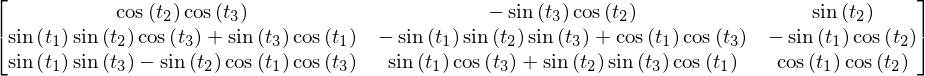

In [23]:
% time R_rpy = trigsimp(R_x * R_y * R_z)
R_rpy

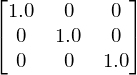

In [24]:
roll = 0
pitch = 0
yaw = 0

R_rpy.evalf(subs={r: roll, p: pitch, y: yaw})

## Inverse Kinematics Solver

This is the code for the inverse kinematics solver for the ``KR210`` manipulator. First we define functions that help with the trigonometric and numerical analysis. Then we test the solver routine by comparing with the expectations given by forward kinematics.

In [26]:
# evaluate arcus cosinus with arcus tangens
arccos = lambda D: atan2(sqrt(1 - D**2), D)

# cosine law
# returns the cosinus of the angle between a,b
# c denotes the side opposite to the angle
cosine_law = lambda c, a, b: (a**2 + b**2 - c**2) / (2 * a * b)

# set entries smaller than 1e-12 to zero since they are most likely numerical artefacts
truncate = lambda x: 0 if not isnan(x) and abs(x) < 1e-12 else x

Here we test the inverse kinematics code. Type in a test case of joint variables. Forward kinematics is applied to generate values for end effector location p and orientation R. Inverse kinematics is applied to calculate a solution. This solution is compared to the original test data by calculating the difference and truncating small numerical values to zero.

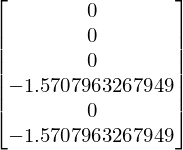

In [27]:
#############
# Test Data #
#############

# test values for joint variables  
q = [pi / 4, 0, 0, 0, 0, 0]

T_test = T0_G_0.evalf(subs={q1: q[0], q2: q[1], q3: q[2], q4: q[3], q5: q[4], q6: q[5]}).applyfunc(truncate)
#print(T_test)

# prepare test data
p = T_test[0:3, 3]
R = T_test[0:3, 0:3]

###########################
# Inverse Kinematics Code #
###########################

# This code used in IK_server.py

### WRIST CENTER ###

# wrist center vector w in frame 0, s[d7] = 0.303 from DH table
w = p - s[d7] * R[:, 0]

# Calculate wrist center in xy-plane coordinates (xc, yc) from base frame coordinates w.
# Then we evaluate a sss triangle in xy-plane, see writeup.
# The sides of the triangle are l23, l25 and l35.
# The relevant angles are phi2 between l23 and l25, and phi3 between l23 and l35.

# xc is length of projection of wrist center in (X_0, Y_0) plane minus offset from joint 2
xc = norm([w[0], w[1]]) - s[a1]

# yc is w component in Z_0 direction minus offset from joint 2
yc = w[2] - s[d1]

# Calculate distances between joints
l25 = norm([xc, yc])       # distance between wrist center w and joint 2
l23 = s[a2]                # distance between joints 2 and 3, see DH table
l35 = norm([s[a3], s[d4]]) # distance between joints 3 and 5, see DH table

### THETA 1 ###

theta1 = atan2(p[1], p[0]).evalf()


### THETA 3 ###

# Calculate phi3 (<l23,l35) with cosine law, D3 = cos(phi3)
D3 = cosine_law(l25, l23, l35)
phi3 = arccos(D3)

# Offset for theta3 due to arm design
delta = abs(atan2(s[a3], s[d4]))

# theta3 from angle phi3 and offset delta
theta3 = (pi/2 - phi3 - delta).evalf()


### THETA 2 ###

# Calculate phi2 (<l23,l25) with cosine law, D2 = cos(phi2)
D2 = cosine_law(l35, l23, l25)
phi2 = arccos(D2)

# alpha is the angle between x-axis and the line l25 in the xy-plane
alpha = atan2(yc, xc)

# theta2 from angle phi2 and angle alpha
theta2 = (pi/2 - phi2 - alpha).evalf()

### THETA 4, 5, 6 ###

# Evaluate wrist center rotation matrix using calculated angles
R3_0_eval = R3_0.evalf(subs={q1: theta1, q2: theta2, q3: theta3})

# Rotation matrix from wrist to gripper
R3_6 = R3_0_eval * R

# Entries of the rotation matrix
r11 = R3_6[0,0]
r21 = R3_6[1,0]
r31 = R3_6[2,0]
r32 = R3_6[2,1]
r33 = R3_6[2,2]

# Euler angles, cf. conventions in writeup    
theta6 = atan2( r21, r11).evalf()                    # alpha, rotation about z-axis
theta5 = atan2(-r31, sqrt(r11**2 + r21**2)).evalf()  # beta,  rotation about y-axis
theta4 = atan2( r32, r33).evalf()                    # gamma, rotation about x-axis

##########################
# Print the test results #
##########################

# difference between expected and calculated values for the joint variables
diff = Matrix(q) - Matrix([theta1, theta2, theta3, theta4, theta5, theta6])

# truncate small values to zero
diff.evalf().applyfunc(truncate)